In [1]:
import pandas as pd

In [3]:
hr = pd.read_csv(r"C:\Users\MM COMPUTERS\Downloads\hr_data_500 (1).csv")

In [5]:
hr.head()

,EmployeeID,Age,Gender,Department,JobRole,Salary,Tenure,Attrition
0,2001,53,Female,HR,HR Specialist,49016,8,No
1,2002,30,Male,Sales,Sales Representative,61847,11,No
2,2003,23,Female,HR,HR Manager,53963,14,No
3,2004,53,Female,Finance,Analyst,69388,10,No
4,2005,31,Male,Sales,Sales Representative,46508,8,Yes


In [7]:
hr.shape

(500, 8)

In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  500 non-null    int64 
 1   Age         500 non-null    int64 
 2   Gender      500 non-null    object
 3   Department  500 non-null    object
 4   JobRole     500 non-null    object
 5   Salary      500 non-null    int64 
 6   Tenure      500 non-null    int64 
 7   Attrition   500 non-null    object
dtypes: int64(4), object(4)
memory usage: 31.4+ KB


In [11]:
hr.isnull().sum()

EmployeeID    0
Age           0
Gender        0
Department    0
JobRole       0
Salary        0
Tenure        0
Attrition     0
dtype: int64

In [23]:
hr.columns

Index(['EmployeeID', 'Age', 'Gender', 'Department', 'JobRole', 'Salary',
       'Tenure', 'Attrition'],
      dtype='object')

In [25]:
hr.describe()

,EmployeeID,Age,Salary,Tenure
count,500.000000,500.000000,500.000000,500.000000
mean,2250.500000,39.800000,76837.694000,7.750000
std,144.481833,9.669488,24727.492372,4.681381
min,2001.000000,22.000000,35176.000000,0.000000
25%,2125.750000,32.000000,55878.500000,4.000000
50%,2250.500000,40.000000,76247.000000,8.000000
75%,2375.250000,49.000000,98989.000000,12.000000
max,2500.000000,55.000000,119955.000000,15.000000


In [27]:
hr['Department'].value_counts()

Department
Finance       110
IT            109
Sales         105
HR             88
Operations     88
Name: count, dtype: int64

In [29]:
hr['JobRole'].value_counts()

JobRole
Sales Executive         59
Data Analyst            47
Sales Representative    46
Accountant              42
Analyst                 35
Shift Lead              34
Senior Accountant       33
HR Specialist           32
Support Engineer        31
Software Engineer       31
HR Manager              30
Operations Executive    28
HR Executive            26
Operations Manager      26
Name: count, dtype: int64

In [31]:
total_emp = len(hr)
print(total_emp)

500


In [39]:
attrition_rate = (hr[hr["Attrition"]=="Yes"].shape[0]/total_emp)*100
print(round(attrition_rate, 2), "%")

53.2 %


In [45]:
avg_salary = hr["Salary"].mean()
avg_tenure = hr["Tenure"].mean()

print(round(avg_salary,2))
print(round(avg_tenure,2), "years")

76837.69
7.75 years


# GENDER DISTRIBUTION

Gender
Female    258
Male      242
Name: count, dtype: int64


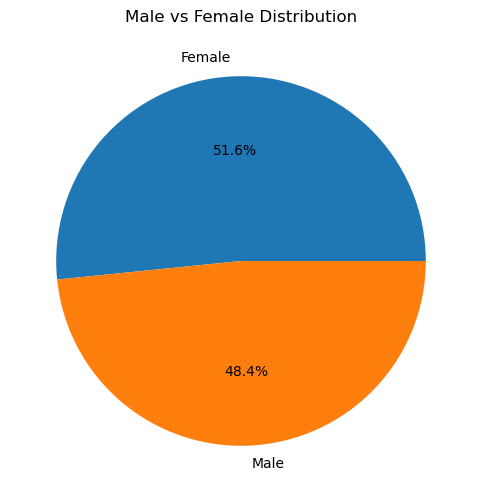

In [71]:
import matplotlib.pyplot as plt



gender_count = hr["Gender"].value_counts()
print(gender_count)


plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%")
plt.title("Male vs Female Distribution")
plt.show()


# Attrition by Department

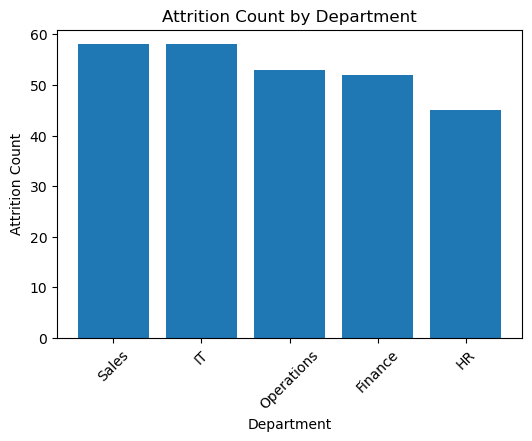

In [78]:
attrition_dept = hr[hr["Attrition"]=="Yes"]["Department"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(attrition_dept.index, attrition_dept.values)
plt.title("Attrition Count by Department")
plt.xlabel("Department")
plt.ylabel("Attrition Count")
plt.xticks(rotation=45)
plt.show()


# Average Salary by Department

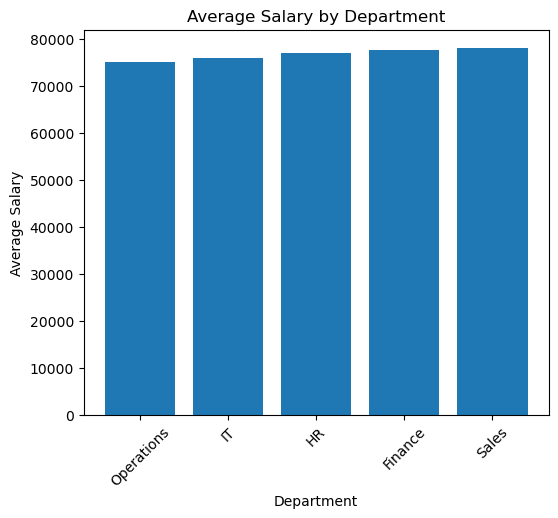

In [83]:
dept_salary = hr.groupby("Department")["Salary"].mean().sort_values()

plt.figure(figsize=(6,5))
plt.bar(dept_salary.index, dept_salary.values)
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()


# Create Tenure Groups

In [92]:
bins = [0,2,5,10,20]
labels = ["0–2 yrs","2–5 yrs","5–10 yrs","10+ yrs"]

hr["TenureGroup"] = pd.cut(hr["Tenure"], bins=bins, labels=labels)
print(hr["TenureGroup"])

0      5–10 yrs
1       10+ yrs
2       10+ yrs
3      5–10 yrs
4      5–10 yrs
         ...   
495     10+ yrs
496         NaN
497     10+ yrs
498         NaN
499     0–2 yrs
Name: TenureGroup, Length: 500, dtype: category
Categories (4, object): ['0–2 yrs' < '2–5 yrs' < '5–10 yrs' < '10+ yrs']


# Employees by Tenure Group

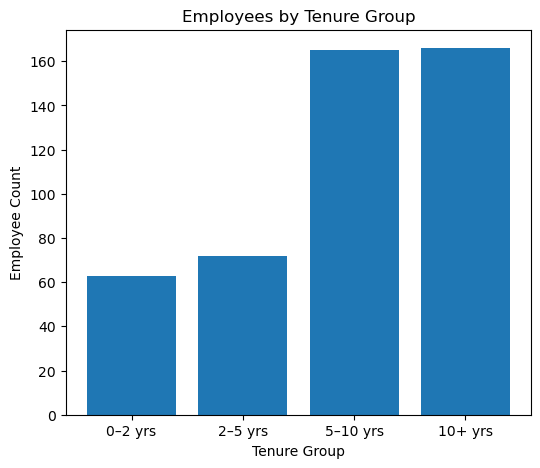

In [97]:
tenure_count = hr["TenureGroup"].value_counts().sort_index()

plt.figure(figsize=(6,5))
plt.bar(tenure_count.index, tenure_count.values)
plt.title("Employees by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Employee Count")
plt.show()


# Attrition by Tenure Group

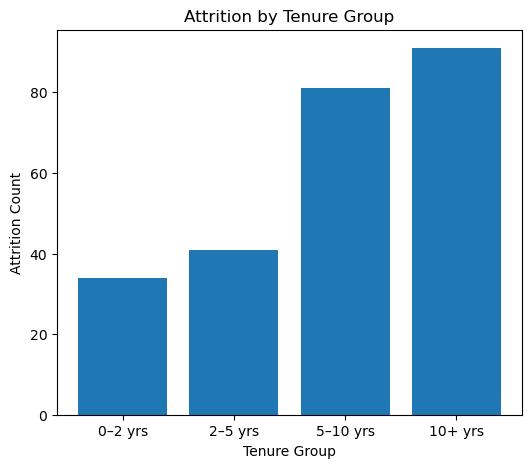

In [103]:
attrition_tenure = hr[hr["Attrition"]=="Yes"]["TenureGroup"].value_counts().sort_index()

plt.figure(figsize=(6,5))
plt.bar(attrition_tenure.index, attrition_tenure.values)
plt.title("Attrition by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Attrition Count")
plt.show()
